# Main Notebook
This notebook is for the main analysis and experimentation.

In [24]:
# Enable autoreloading of imported modules
%load_ext autoreload
%autoreload 2

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Add the repo root to access the courselib
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
courselib_path = os.path.join(repo_root, "AppliedML", "courselib")
if courselib_path not in sys.path:
    sys.path.insert(0, courselib_path)
    print(f"{courselib_path} added to sys.path.")
else:
    print("Courselib path already in sys.path.")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Courselib path already in sys.path.


As this project is supposed to integrate well with the courselib, we have downloaded the current GitHub Repo up to week 11 and our code will be integrated within courselib libraries.

In [25]:
from utils.loaders import load_uciadult

# ensure the data directory exists / else create it
os.makedirs('data', exist_ok=True)

# get the data
df = load_uciadult()

Loading from local `data/adult.data`...


In [26]:
# check for missing values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

### Data Cleaning

1.  **Handle Duplicates**: We remove any duplicate rows from the dataset.
2.  **Handle Missing Values**: Instead of removing rows with missing data, we treat the missing values in our categorical columns as a distinct category called 'Missing' as these observations could also contain additional information, expecially when condisering their categorical nature.


In [27]:
from utils.preprocessing import preprocess_data

# preprocessing of  the data
df = preprocess_data(df)


24 duplicate observations in the dataset were removed.


# Exploratory Data Analysis

In [12]:
# basic info about the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [13]:
# summary stats about the variables
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


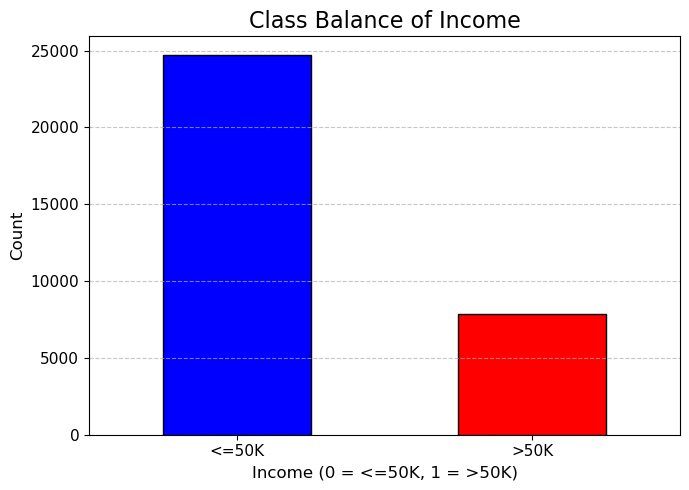

In [19]:
# distribution of the target variable
plt.figure(figsize=(7, 5))
bars = df['income'].value_counts().sort_index().plot(
    kind='bar',
    color=['blue', 'red'],
    edgecolor='black'
)
plt.title('Class Balance of Income', fontsize=16)
plt.xlabel('Income (0 = <=50K, 1 = >50K)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['<=50K', '>50K'], rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

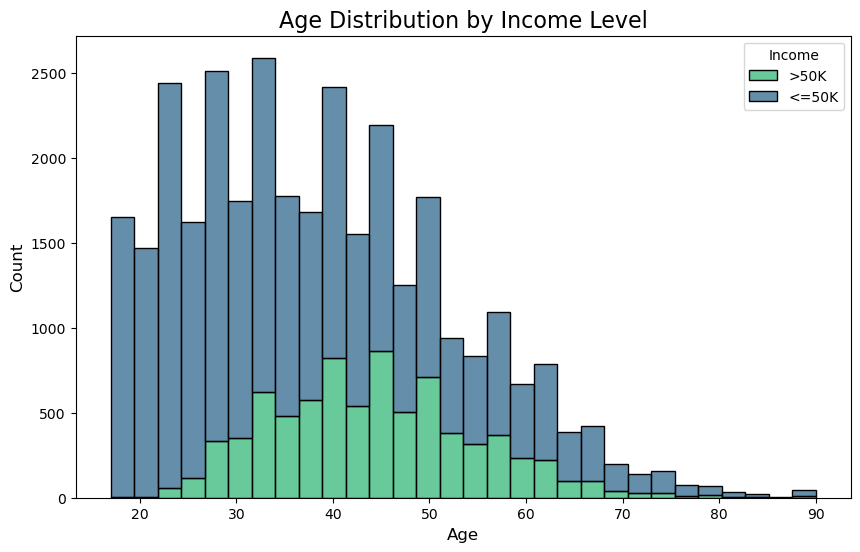

In [21]:
import seaborn as sns

# relationship between income and age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='income', multiple='stack', bins=30, palette='viridis')
plt.title('Age Distribution by Income Level', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Income', labels=['>50K', '<=50K'])
plt.show()

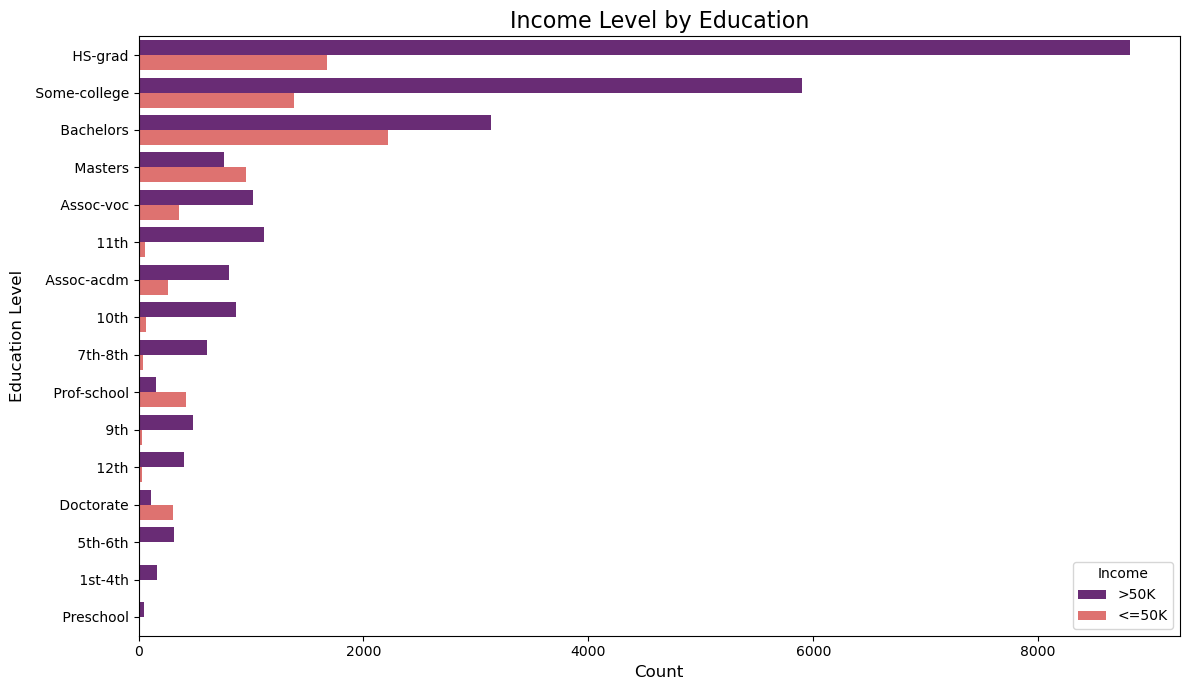

In [22]:
# income by education
plt.figure(figsize=(12, 7))
sns.countplot(y='education', hue='income', data=df, order=df['education'].value_counts().index, palette='magma')
plt.title('Income Level by Education', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.legend(title='Income', labels=['>50K', '<=50K'])
plt.tight_layout()
plt.show()

In [16]:
# first glimpse into the data set
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0



# Feature Engineering


In [ ]:

# encoding strategies for each column
encoding_strategies = {
    'one-hot': ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'],
    'ordinal': {'education': ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
                               'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 'Assoc-acdm',
                                 'Assoc-voc']},
    'target': ['income', 'occupation'] # Target column must be the first in the list
}

# Apply the encoding
df_encoded = encode_features(df.copy(), encoding_strategies)

# Display the first few rows of the encoded dataframe
df_encoded.head()



## Categorical Feature Analysis

To determine the best encoding strategy, we can analyze the relationship between each categorical feature and the target variable (`income`). We'll calculate the mean income for each category to see if there's a natural ordering.


In [ ]:

# Analyze the relationship between categorical features and income
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols.remove('income') # Remove target variable

for col in categorical_cols:
    print(f"--- {col} ---")
    # Group by the column and calculate the mean of the target variable
    # We can do this because the target is 0 or 1
    print(df.groupby(col)['income'].mean().sort_values(ascending=False))
    print("\n")


# Feature Engineering

Now we will apply the encoding strategies we defined in our `preprocessing.py` file. We will create a dictionary to specify which encoding to use for each feature type.